## Name: RISHAB JAIN
## Company : CodersCave
## Data Science Internship


## Task 3 : Mobile price classification 


In [61]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Display all columns

In [62]:
pd.set_option('display.max_columns', None)  


### Loading Training Dataset

In [63]:
df=pd.read_csv("train.csv")
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


### Lets see shape, data types, presence of null variables, Description of the dataset.

In [64]:
print('Number of Rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of Rows: 2000
Number of columns: 21


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Lets check the Sub categories in every column for better understanding of dataset

In [66]:
for i in df.columns:
    print(df[i].value_counts()/len(df)*100)

1872    0.30
618     0.30
1589    0.30
1715    0.25
1807    0.25
        ... 
660     0.05
1452    0.05
1005    0.05
1372    0.05
858     0.05
Name: battery_power, Length: 1094, dtype: float64
0    50.5
1    49.5
Name: blue, dtype: float64
0.5    20.65
2.8     4.25
2.3     3.90
2.1     3.80
1.6     3.80
2.5     3.70
0.6     3.70
1.4     3.50
1.3     3.40
1.5     3.35
2.0     3.35
1.9     3.25
0.7     3.20
2.9     3.10
1.8     3.10
1.0     3.05
1.7     3.00
2.2     2.95
0.9     2.90
2.4     2.90
0.8     2.90
1.2     2.80
2.6     2.75
2.7     2.75
1.1     2.55
3.0     1.40
Name: clock_speed, dtype: float64
1    50.95
0    49.05
Name: dual_sim, dtype: float64
0     23.70
1     12.25
2      9.45
3      8.50
5      6.95
4      6.65
6      5.60
7      5.00
9      3.90
8      3.85
10     3.10
11     2.55
12     2.25
13     2.00
16     1.20
15     1.15
14     1.00
18     0.55
17     0.30
19     0.05
Name: fc, dtype: float64
1    52.15
0    47.85
Name: four_g, dtype: float64
27    2.35
16    2.

`blue`,`four_g`,`fc`,`three_g`,`touch_screen`,`wifi`,`price_range` columns seems to be categorical in nature

In [67]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [68]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### No null values present

### Lets Convert dtypes of observed Columns to object

In [69]:
df_convert=['blue','dual_sim','four_g','three_g','touch_screen','wifi','n_cores']

In [70]:
df[df_convert]=df[df_convert].astype(object)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   object 
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

# EDA

In [72]:
df_num=df.select_dtypes(include=np.number)
df_num.head(5)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,14,1208,1212,1411,8,2,15,1


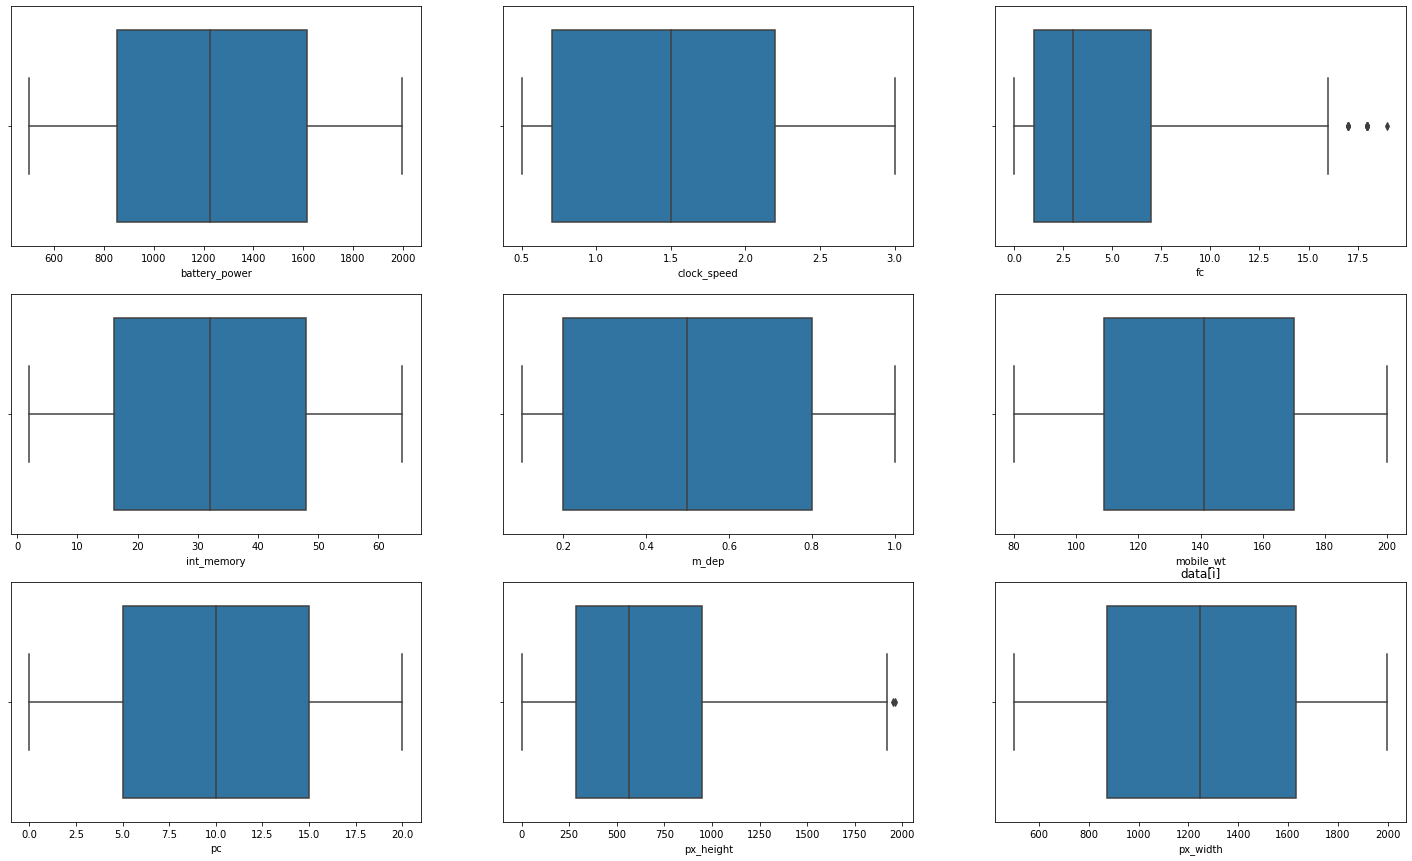

In [73]:
cols = list(df_num.columns)

fig,ax = plt.subplots(3,3,figsize=(25,15))

for i,subplot in zip(cols,ax.flatten()):
    sns.boxplot(df[i],ax=subplot)
    plt.title('data[i]')

### From the above boxplots we can see that there are no outliers

### Let visualize other variables with the target variable and see ther impact on the target variable

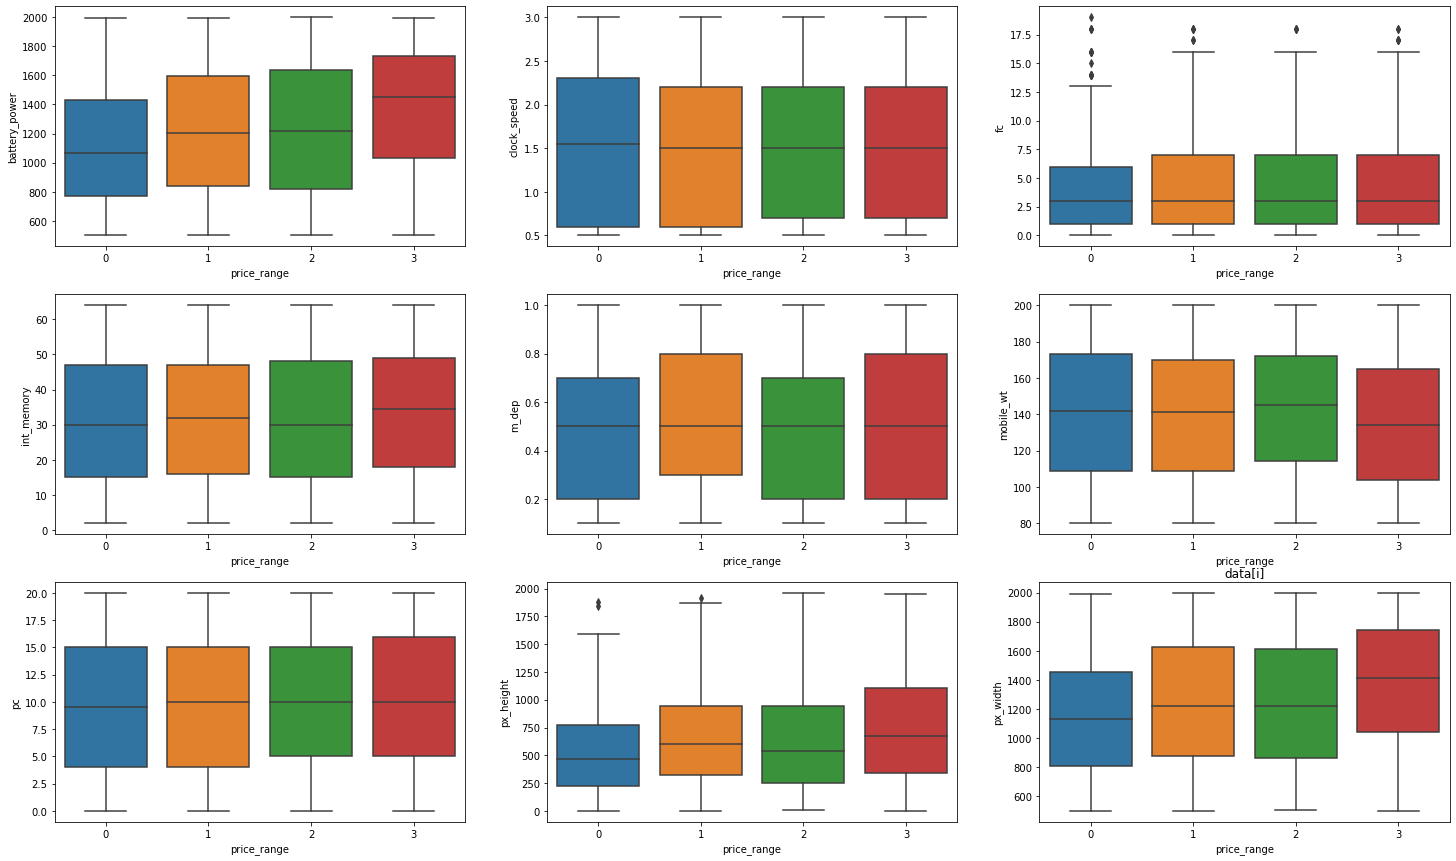

In [74]:
cols = list(df.select_dtypes(include=np.number).columns)

fig,ax = plt.subplots(3,3,figsize=(25,15))

for i,subplot in zip(cols,ax.flatten()):
    sns.boxplot(df['price_range'],df[i],ax=subplot)
    plt.title('data[i]')

### From the above we can see that target variable is price range is not majorly effected by any numerical variable

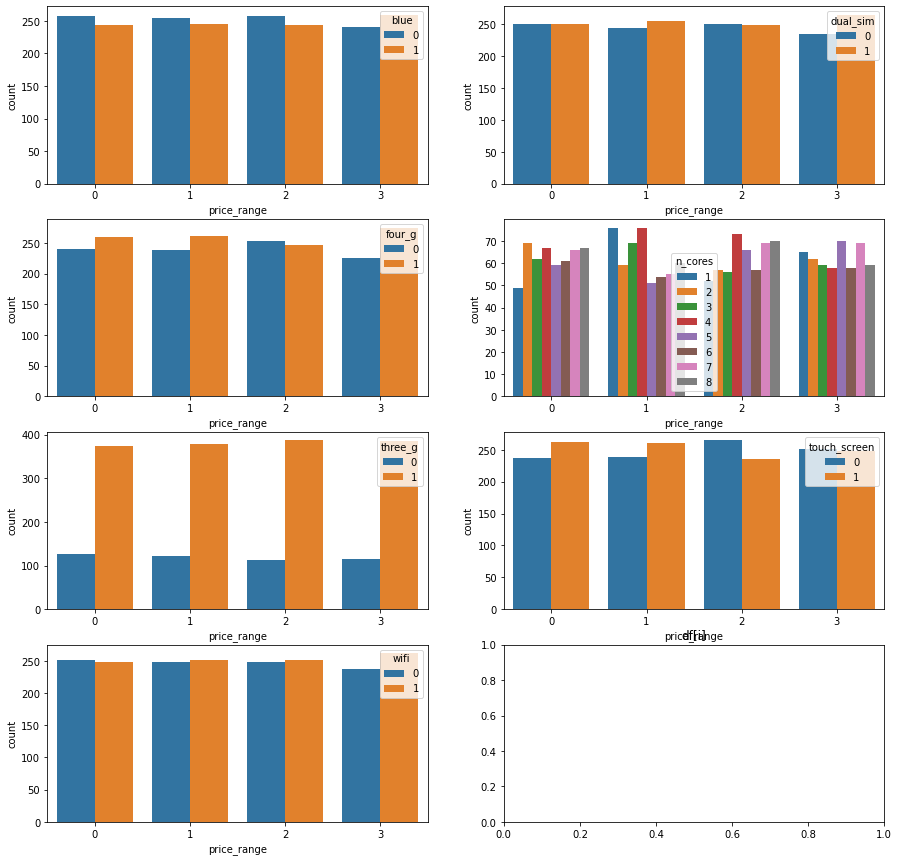

In [75]:
cols = list(df.select_dtypes(exclude=np.number).columns)

fig,ax = plt.subplots(4,2,figsize=(15,15))

for i,subplot in zip(cols,ax.flatten()):
    sns.countplot(x=df['price_range'],hue=df[i],ax=subplot)
    plt.title('df[i]')

### From the above we can see 3G mobiles are costlier

# Modelling

In [76]:
from sklearn.model_selection import train_test_split

x = df.drop('price_range',axis=1)
y = df[['price_range']]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=11)

In [77]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1600, 20)
(1600, 1)
(400, 20)
(400, 1)


## Decision Tree

1. Decision trees assume nonlinearity and can capture interactions between predictor variables without relying on specific distributions.
2. They are not affected by variable scales and can handle both continuous and categorical variables.
3. ecision trees provide variable importance measures to assess the contribution of predictors.
4. They can handle outliers and missing values, although outliers may impact the tree structure.
5. Decision trees are prone to overfitting, but regularization techniques like pruning or ensemble methods can mitigate this issue.

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

In [86]:
DT_model = DecisionTreeClassifier()
DT_model.fit(xtrain,ytrain)
DT_pred = DT_model.predict(xtest)
print(classification_report(ytest,DT_pred))
print('accuracy_score:',accuracy_score(ytest,DT_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       104
           1       0.83      0.82      0.82        98
           2       0.79      0.81      0.80        97
           3       0.90      0.90      0.90       101

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.87       400

accuracy_score: 0.865


## Random Forest

1. Random forests, an ensemble method based on decision trees, also assume nonlinearity and can capture interactions between predictors.
2. They are robust to variable scales and can handle both continuous and categorical variables without distributional assumptions.
3. Random forests provide variable importance measures, indicating the predictors' contribution to the model's performance.
4. They can handle outliers and missing values similarly to decision trees, but outliers may influence individual trees' outcomes.
5. Random forests help mitigate overfitting by combining multiple decision trees through bagging and feature randomization, enhancing generalization performance.

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
RF_model = RandomForestClassifier()
RF_model.fit(xtrain,ytrain)
RF_pred = RF_model.predict(xtest)
print(classification_report(ytest,RF_pred))
print('accuracy_score:',accuracy_score(ytest,RF_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       104
           1       0.83      0.87      0.85        98
           2       0.84      0.81      0.83        97
           3       0.92      0.91      0.92       101

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

accuracy_score: 0.88


## From the above 2 models random forest has better accuracy


## deploying test data.

In [123]:
df_test=pd.read_csv('test.csv')
df_test.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


### Lets see shape, data types, presence of null variables, Description of the dataset.

In [124]:
print('Number of Rows:',df_test.shape[0])
print('Number of columns:',df_test.shape[1])

Number of Rows: 1000
Number of columns: 21


In [125]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

### Lets check the Sub categories in every column for better understanding of dataset

In [126]:
for i in df_test.columns:
    print(df_test[i].value_counts()/len(df)*100)

1       0.05
672     0.05
659     0.05
660     0.05
661     0.05
        ... 
339     0.05
340     0.05
341     0.05
342     0.05
1000    0.05
Name: id, Length: 1000, dtype: float64
1074    0.25
1981    0.25
529     0.20
1745    0.20
1715    0.20
        ... 
1248    0.05
1392    0.05
1706    0.05
1297    0.05
1185    0.05
Name: battery_power, Length: 721, dtype: float64
1    25.8
0    24.2
Name: blue, dtype: float64
0.5    9.95
0.6    2.00
2.6    2.00
1.4    1.95
2.9    1.90
1.3    1.90
2.1    1.85
1.6    1.85
2.5    1.80
0.9    1.70
2.7    1.65
2.8    1.65
2.4    1.65
1.1    1.65
1.8    1.60
1.7    1.50
2.2    1.45
0.8    1.45
0.7    1.40
2.3    1.40
1.9    1.40
1.5    1.35
1.2    1.35
1.0    1.30
2.0    1.25
3.0    1.05
Name: clock_speed, dtype: float64
1    25.85
0    24.15
Name: dual_sim, dtype: float64
0     10.50
1      6.20
2      4.85
4      4.00
5      3.70
3      3.50
6      2.95
7      2.50
9      2.05
8      1.90
10     1.85
11     1.45
13     1.05
12     0.85
14     0.80


`blue`,`four_g`,`fc`,`three_g`,`touch_screen`,`wifi`,`price_range` columns seems to be categorical in nature

In [127]:
df_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [128]:
df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

### No null values present

### Lets Convert dtypes of observed Columns to object

In [129]:
df_convert=['blue','dual_sim','four_g','three_g','touch_screen','wifi','n_cores']

In [130]:
df_test[df_convert]=df_test[df_convert].astype(object)

In [131]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   object 
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   object 
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   object 
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   object 
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

## Prediction using Random Forest

In [132]:
df_test_final=df_test.drop('id',axis=1)

In [138]:
prediction_test_data = RF_model.predict(df_test_final)

In [139]:
prediction_test_data

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 1, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 2, 3, 3, 1, 2, 1, 0, 0, 1, 3, 1, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 2, 0, 3, 1, 2, 0,
       0, 2, 0, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 1, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

In [140]:
prediction_test_data=pd.DataFrame({"price_range":prediction_test_data})
prediction_test_data

,price_range
0,3
1,3
2,2
3,3
4,1
...,...
995,2
996,1
997,0
998,2


In [141]:
pd.concat([df_test, prediction_test_data], axis=1)


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,2
996,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,2
